In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import seaborn as sns
from patsy import dmatrices 


In [2]:
from sklearn.linear_model  import LogisticRegression
from sklearn import metrics
from  sklearn.model_selection import train_test_split


In [3]:
dta =sm.datasets.fair.load_pandas().data
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
dta['affair'] = (dta.affairs >0).astype(int) 
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe") 

In [6]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [7]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [8]:
X.shape

(6366, 17)

In [9]:
X = X.rename(columns =  
{'C(occupation)[T.2.0]':'occ_2', 
'C(occupation)[T.3.0]':'occ_3', 
'C(occupation)[T.4.0]':'occ_4', 
'C(occupation)[T.5.0]':'occ_5', 
'C(occupation)[T.6.0]':'occ_6', 
'C(occupation_husb)[T.2.0]':'occ_husb_2', 
'C(occupation_husb)[T.3.0]':'occ_husb_3', 
'C(occupation_husb)[T.4.0]':'occ_husb_4', 
'C(occupation_husb)[T.5.0]':'occ_husb_5', 
'C(occupation_husb)[T.6.0]':'occ_husb_6'}) 

In [10]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [11]:
#check for null values
X.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

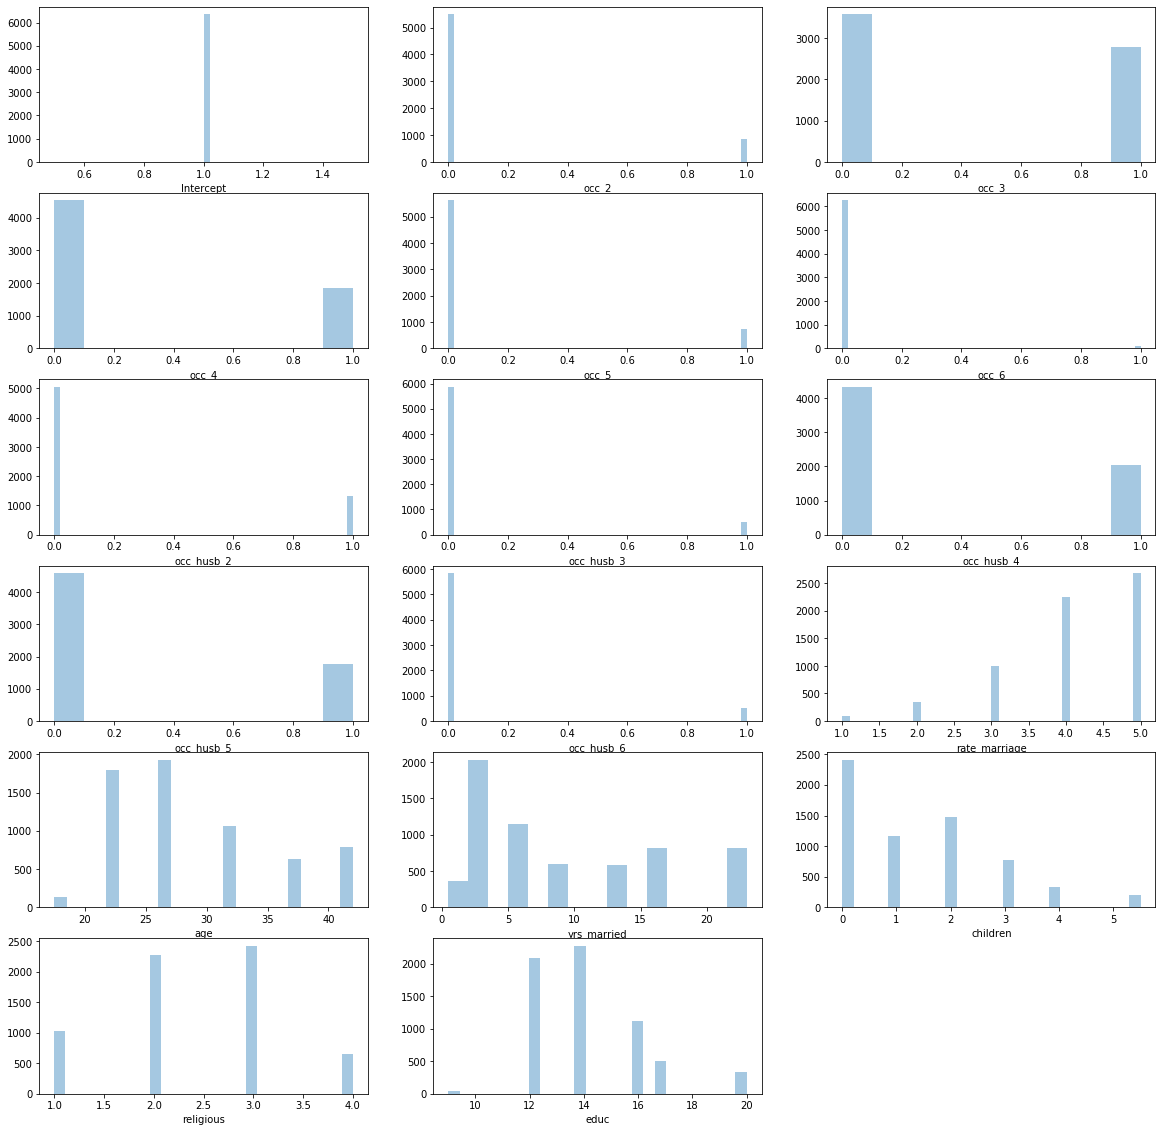

In [16]:
fig=plt.figure(figsize=(20,20))
plotnumber=1

for column in X:
    if plotnumber <=17:
        plt.subplot(6,3,plotnumber)
        sns.distplot(X[column],kde=False)
        plt.xlabel(column)
    plotnumber+=1


### visualizing the columns having non-categorical values

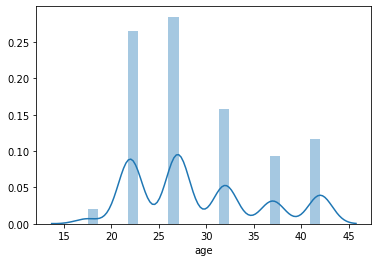

In [17]:
sns.distplot(X['age'])

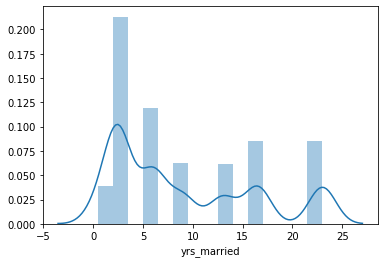

In [18]:
sns.distplot(X['yrs_married'])

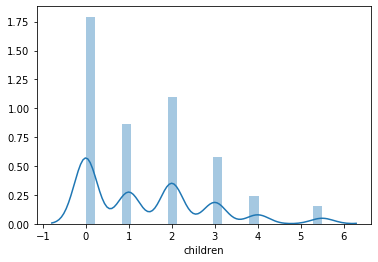

In [19]:
sns.distplot(X['children'])

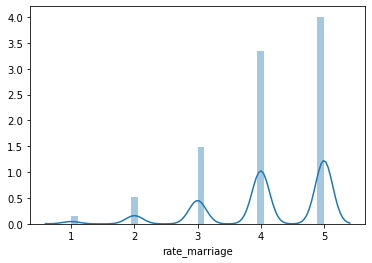

In [22]:
sns.distplot(X['rate_marriage'])

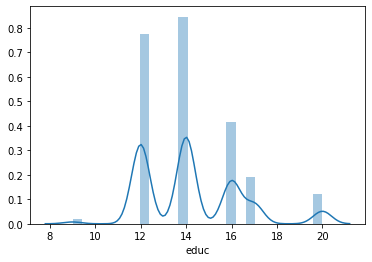

In [24]:
sns.distplot(X['educ'])

### check for outliers

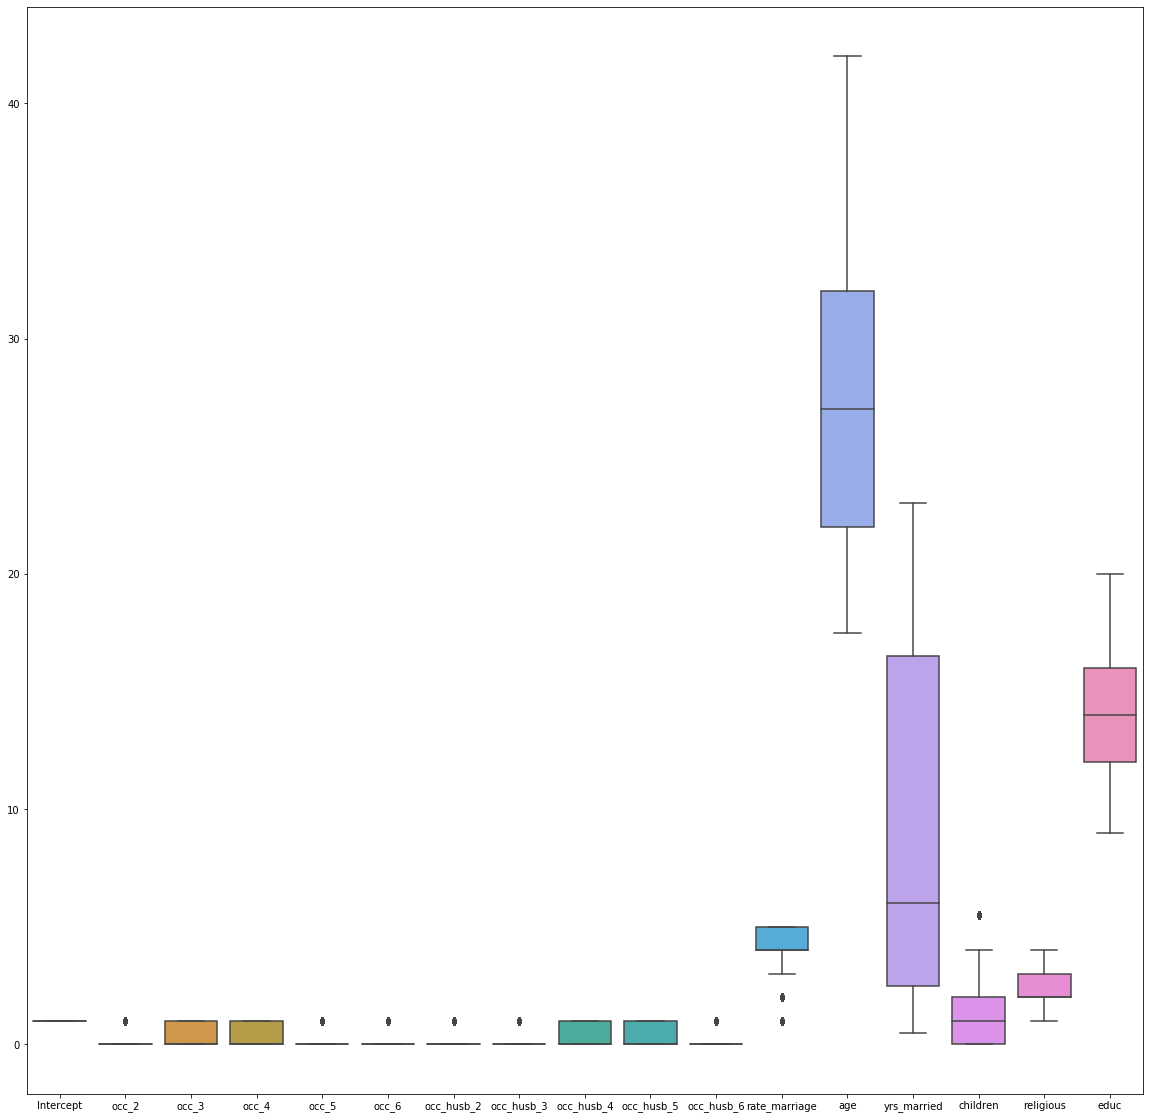

In [25]:
plt.figure(figsize=(20,20))
sns.boxplot(data=X)

### Feature Selection


#### Since the column Intercept is having constant values we are dropping that column 

In [27]:
X=X.drop('Intercept',axis=1)

In [28]:
X.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


### 1.Correlation matrix

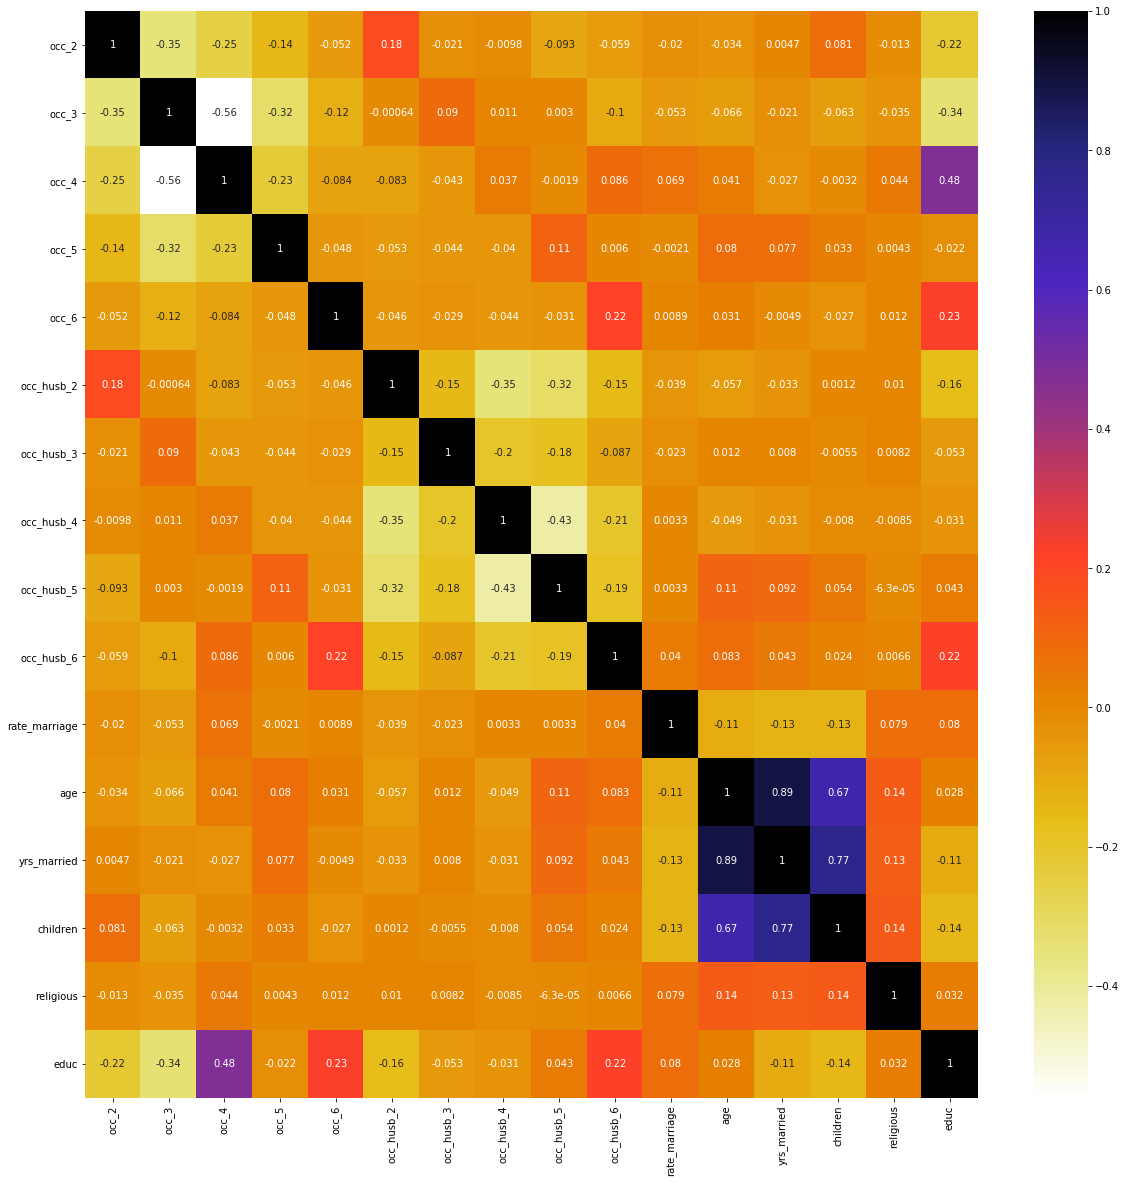

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(),annot=True,cmap=plt.cm.CMRmap_r)

In [34]:
#function to remove the features having high correlation values i.e 0.9 and -0.9

def remove_high_corrrelation_features(df,threshold):
    corr_matrix=df.corr()
    result=[]
    
    for i in range(len(corr_matrix)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                column=df.columns[i]
                result.append(column)
    return result




In [36]:
remove_high_corrrelation_features(X,0.9)

[]

#### There are no highly correlated features in this dataset

### 2.Information Gain

In [42]:
from sklearn.feature_selection import mutual_info_classif
feature=mutual_info_classif(X,y)


F:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [47]:
feature=pd.Series(feature,index=X.columns,name='Gain')


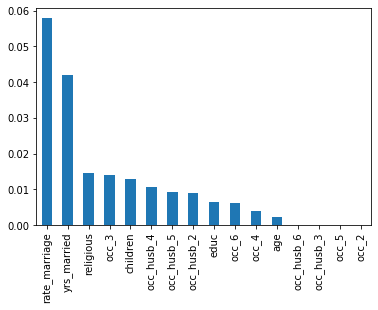

In [50]:
feature.sort_values(ascending=False).plot(kind='bar')

In [51]:
feature.sort_values(ascending=False)

rate_marriage    0.057979
yrs_married      0.041874
religious        0.014660
occ_3            0.013970
children         0.012885
occ_husb_4       0.010516
occ_husb_5       0.009236
occ_husb_2       0.008984
educ             0.006486
occ_6            0.006086
occ_4            0.004034
age              0.002371
occ_husb_6       0.000000
occ_husb_3       0.000000
occ_5            0.000000
occ_2            0.000000
Name: Gain, dtype: float64

#### Variance inflation factor

In [53]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

In [56]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i)  for i in range(X_scaled.shape[1])]


In [57]:
vif['feature']=X.columns
vif

,vif,feature
0,19.340780,occ_2
1,39.335618,occ_3
2,32.931910,occ_4
3,17.057165,occ_5
4,3.697959,occ_6
5,5.566292,occ_husb_2
6,2.991070,occ_husb_3
7,6.930281,occ_husb_4
8,6.577077,occ_husb_5
9,3.185266,occ_husb_6


#### Since the vif value is greater than 10 for some features ,we are removing  occ_2,occ_husb_4 features from the dataset

In [58]:
xnew_occ_2=X

In [59]:
xnew_occ_2=xnew_occ_2.drop('occ_2',axis=1)

In [60]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(xnew_occ_2)

In [61]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = xnew_occ_2.columns

#let's check the values
vif

,vif,Features
0,2.394978,occ_3
1,2.682939,occ_4
2,1.707105,occ_5
3,1.265109,occ_6
4,5.517295,occ_husb_2
5,2.978120,occ_husb_3
6,6.885971,occ_husb_4
7,6.537050,occ_husb_5
8,3.175051,occ_husb_6
9,1.038647,rate_marriage


In [62]:
xnew_occ_2_occ_husb_4=X

In [63]:
xnew_occ_2_occ_husb_4=xnew_occ_2_occ_husb_4.drop('occ_2',axis=1)

In [64]:
xnew_occ_2_occ_husb_4=xnew_occ_2_occ_husb_4.drop('occ_husb_4',axis=1)

In [65]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(xnew_occ_2_occ_husb_4)

In [66]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = xnew_occ_2_occ_husb_4.columns

#let's check the values
vif

,vif,Features
0,2.394861,occ_3
1,2.682365,occ_4
2,1.707082,occ_5
3,1.265071,occ_6
4,1.290667,occ_husb_2
5,1.134900,occ_husb_3
6,1.322876,occ_husb_5
7,1.227025,occ_husb_6
8,1.038353,rate_marriage
9,5.466767,age


In [67]:
x=xnew_occ_2_occ_husb_4

### Train Test split

In [94]:
y = np.ravel(y) 

In [95]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [96]:
x_train.shape

(4774, 14)

In [97]:
x_test.shape

(1592, 14)

In [85]:
#y_train=y_train.values

In [98]:
y_train

array([1., 0., 0., ..., 0., 0., 0.])

In [100]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [101]:
model=log_reg.fit(x_train,y_train)

In [102]:
y_pred = log_reg.predict(x_test)

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

In [105]:
confusion_matrix(y_test,y_pred)

array([[970, 114],
       [331, 177]], dtype=int64)

In [106]:
accuracy_score(y_test,y_pred)

0.7204773869346733

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81      1084
         1.0       0.61      0.35      0.44       508

    accuracy                           0.72      1592
   macro avg       0.68      0.62      0.63      1592
weighted avg       0.70      0.72      0.70      1592



In [116]:
TP=confusion_matrix(y_test,y_pred)[0][0]
FP=confusion_matrix(y_test,y_pred)[0][1]
FN=confusion_matrix(y_test,y_pred)[1][0]
TN=confusion_matrix(y_test,y_pred)[1][1]

In [117]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Accuracy

0.7204773869346733

In [118]:
Precision=(TP)/(TP+FP)
Precision

0.8948339483394834

In [119]:
Recall=(TP)/(TP+FN)
Recall

0.7455803228285934

In [120]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6216295725949386

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

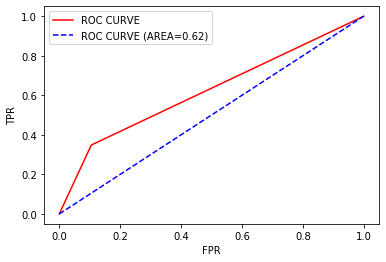

In [126]:
plt.plot(fpr,tpr,color='red',label='ROC CURVE')
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROC CURVE (AREA=%.2f)'% auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [109]:
Y=pd.DataFrame()

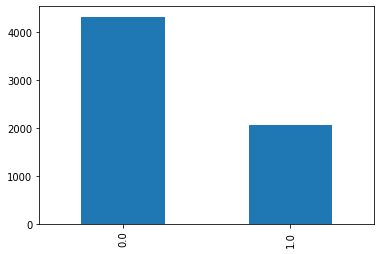

In [114]:
#Y['Actual']=list(y)
Y.Actual.value_counts().plot(kind='bar')

### Since we are having imbalanced dataset we are increasing the weights for ones to make it balanced and also performing cross validation

In [128]:
class_weight=dict({0:1,1:2})

In [137]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [143]:
log_reg=LogisticRegression(class_weight=class_weight)
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,shuffle=False,random_state=None)

In [144]:
clf=GridSearchCV(log_reg,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [145]:
clf.fit(x_train,y_train)

F:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.66662738        nan 0.66632459        nan 0.66723878
        nan 0.66768707        nan 0.66787231]
  category=UserWarning


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight={0: 1, 1: 2}), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [146]:
clf.best_params_

{'C': 100.0, 'penalty': 'l2'}

In [147]:
log_reg=LogisticRegression(class_weight=class_weight)
grid={'C':[100],'penalty':['l2']}
cv=KFold(n_splits=5,shuffle=False,random_state=None)

In [148]:
clf=GridSearchCV(log_reg,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [149]:
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(class_weight={0: 1, 1: 2}), n_jobs=-1,
             param_grid={'C': [100], 'penalty': ['l2']}, scoring='f1_macro')

In [151]:
pred_y=clf.predict(x_test)

In [152]:
print(confusion_matrix(y_test,pred_y))
print("Accuracy Score {}".format(accuracy_score(y_test,pred_y)))
print("Classification report: {}".format(classification_report(y_test,pred_y)))

[[786 298]
 [189 319]]
Accuracy Score 0.6940954773869347
Classification report:               precision    recall  f1-score   support

         0.0       0.81      0.73      0.76      1084
         1.0       0.52      0.63      0.57       508

    accuracy                           0.69      1592
   macro avg       0.66      0.68      0.67      1592
weighted avg       0.71      0.69      0.70      1592



In [153]:
TP=confusion_matrix(y_test,y_pred)[0][0]
FP=confusion_matrix(y_test,y_pred)[0][1]
FN=confusion_matrix(y_test,y_pred)[1][0]
TN=confusion_matrix(y_test,y_pred)[1][1]

In [154]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
Precision=(TP)/(TP+FP)
Recall=(TP)/(TP+FN)
print('Accuracy:',Accuracy)
print('Precision',Precision)
print('Recall',Recall)

Accuracy: 0.7204773869346733
Precision 0.8948339483394834
Recall 0.7455803228285934


In [155]:
auc=roc_auc_score(y_test,pred_y)
auc

0.6765225034140105

In [156]:
fpr,tpr,threshold=roc_curve(y_test,pred_y)

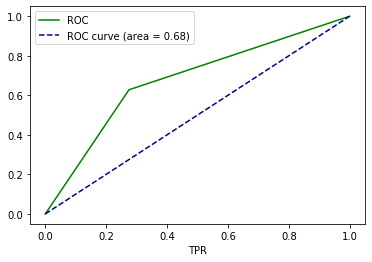

In [157]:
plt.plot(fpr,tpr,color='green',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.legend()